In [25]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import seaborn as sns
import lightgbm as lgbm
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score

pd.set_option('max_columns',100)

#import warnings
#warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('carsdataset.csv')
train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [5]:
train = train.rename(columns={'MSRP': 'price'})
train = train.dropna()
train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
#rows

train.shape[0]

8084

In [7]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train.columns.values.tolist()
for col in features:
    if train[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train.columns:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))

In [8]:
train.describe()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,22.039213,357.755443,2012.058634,5.878649,274.642751,5.778080,1.346858,1.683201,3.414151,40.982434,1.018308,7.509030,26.650915,19.553686,1499.397823,5.007267e+04
std,14.437040,212.102443,6.317981,1.367875,115.003475,1.886088,0.893944,1.159530,0.898087,23.106688,0.877453,5.031687,7.720473,7.159964,1413.855615,7.029313e+04
min,0.000000,0.000000,1990.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,9.000000,168.000000,2010.000000,5.000000,192.000000,4.000000,1.000000,0.000000,2.000000,22.000000,0.000000,3.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,20.000000,351.000000,2015.000000,6.000000,264.000000,6.000000,1.000000,2.000000,4.000000,45.000000,1.000000,8.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,33.000000,550.000000,2016.000000,7.000000,320.000000,6.000000,1.000000,3.000000,4.000000,62.000000,2.000000,14.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,46.000000,712.000000,2017.000000,7.000000,1001.000000,16.000000,4.000000,3.000000,4.000000,69.000000,2.000000,15.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
train_stat = train.describe(percentiles = [.05,.1, .9,.95])
train_stat

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,22.039213,357.755443,2012.058634,5.878649,274.642751,5.778080,1.346858,1.683201,3.414151,40.982434,1.018308,7.509030,26.650915,19.553686,1499.397823,5.007267e+04
std,14.437040,212.102443,6.317981,1.367875,115.003475,1.886088,0.893944,1.159530,0.898087,23.106688,0.877453,5.031687,7.720473,7.159964,1413.855615,7.029313e+04
min,0.000000,0.000000,1990.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
5%,3.000000,25.000000,1996.000000,4.000000,130.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,17.000000,12.000000,155.000000,2.179300e+03
10%,4.000000,67.000000,2003.000000,4.000000,150.000000,4.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,19.000000,13.000000,204.000000,1.682750e+04
50%,20.000000,351.000000,2015.000000,6.000000,264.000000,6.000000,1.000000,2.000000,4.000000,45.000000,1.000000,8.000000,26.000000,18.000000,1013.000000,3.500500e+04
90%,45.000000,643.000000,2017.000000,7.000000,430.000000,8.000000,3.000000,3.000000,4.000000,66.000000,2.000000,14.000000,34.000000,26.000000,3916.000000,8.446100e+04
95%,45.000000,675.000000,2017.000000,7.000000,520.000000,8.000000,3.000000,3.000000,4.000000,68.000000,2.000000,14.000000,38.000000,30.000000,5657.000000,1.508691e+05
max,46.000000,712.000000,2017.000000,7.000000,1001.000000,16.000000,4.000000,3.000000,4.000000,69.000000,2.000000,15.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
train_stat.loc['max',:]-train_stat.loc['95%',:]

Make                       1.0
Model                     37.0
Year                       0.0
Engine Fuel Type           0.0
Engine HP                481.0
Engine Cylinders           8.0
Transmission Type          1.0
Driven_Wheels              0.0
Number of Doors            0.0
Market Category            1.0
Vehicle Size               0.0
Vehicle Style              1.0
highway MPG              316.0
city mpg                 107.0
Popularity                 0.0
price                1915032.9
dtype: float64

In [11]:
train_stat.loc['95%',:]-train_stat.loc['90%',:]

Make                     0.0
Model                   32.0
Year                     0.0
Engine Fuel Type         0.0
Engine HP               90.0
Engine Cylinders         0.0
Transmission Type        0.0
Driven_Wheels            0.0
Number of Doors          0.0
Market Category          2.0
Vehicle Size             0.0
Vehicle Style            0.0
highway MPG              4.0
city mpg                 4.0
Popularity            1741.0
price                66408.1
dtype: float64

In [12]:
(train_stat.loc['max',:]-train_stat.loc['95%',:])/(train_stat.loc['95%',:]-train_stat.loc['90%',:])

Make                       inf
Model                 1.156250
Year                       NaN
Engine Fuel Type           NaN
Engine HP             5.344444
Engine Cylinders           inf
Transmission Type          inf
Driven_Wheels              NaN
Number of Doors            NaN
Market Category       0.500000
Vehicle Size               NaN
Vehicle Style              inf
highway MPG          79.000000
city mpg             26.750000
Popularity            0.000000
price                28.837339
dtype: float64

In [13]:
train_stat.loc['10%',:]-train_stat.loc['5%',:]

Make                     1.0
Model                   42.0
Year                     7.0
Engine Fuel Type         0.0
Engine HP               20.0
Engine Cylinders         0.0
Transmission Type        1.0
Driven_Wheels            0.0
Number of Doors          0.0
Market Category          0.0
Vehicle Size             0.0
Vehicle Style            2.0
highway MPG              2.0
city mpg                 1.0
Popularity              49.0
price                14648.2
dtype: float64

In [14]:
train_stat.loc['5%',:]-train_stat.loc['min',:]

Make                   3.0
Model                 25.0
Year                   6.0
Engine Fuel Type       4.0
Engine HP             75.0
Engine Cylinders       4.0
Transmission Type      0.0
Driven_Wheels          0.0
Number of Doors        0.0
Market Category        0.0
Vehicle Size           0.0
Vehicle Style          0.0
highway MPG            5.0
city mpg               5.0
Popularity           153.0
price                179.3
dtype: float64

In [15]:
(train_stat.loc['5%',:]-train_stat.loc['min',:])/(train_stat.loc['10%',:]-train_stat.loc['5%',:])

Make                 3.000000
Model                0.595238
Year                 0.857143
Engine Fuel Type          inf
Engine HP            3.750000
Engine Cylinders          inf
Transmission Type    0.000000
Driven_Wheels             NaN
Number of Doors           NaN
Market Category           NaN
Vehicle Size              NaN
Vehicle Style        0.000000
highway MPG          2.500000
city mpg             5.000000
Popularity           3.122449
price                0.012240
dtype: float64

In [16]:
train_stat.loc[['10%','90%','95%'],:]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
10%,4.0,67.0,2003.0,4.0,150.0,4.0,1.0,0.0,2.0,0.0,0.0,2.0,19.0,13.0,204.0,16827.5
90%,45.0,643.0,2017.0,7.0,430.0,8.0,3.0,3.0,4.0,66.0,2.0,14.0,34.0,26.0,3916.0,84461.0
95%,45.0,675.0,2017.0,7.0,520.0,8.0,3.0,3.0,4.0,68.0,2.0,14.0,38.0,30.0,5657.0,150869.1


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
Make                 8084 non-null int64
Model                8084 non-null int64
Year                 8084 non-null int64
Engine Fuel Type     8084 non-null int64
Engine HP            8084 non-null float64
Engine Cylinders     8084 non-null float64
Transmission Type    8084 non-null int64
Driven_Wheels        8084 non-null int64
Number of Doors      8084 non-null float64
Market Category      8084 non-null int64
Vehicle Size         8084 non-null int64
Vehicle Style        8084 non-null int64
highway MPG          8084 non-null int64
city mpg             8084 non-null int64
Popularity           8084 non-null int64
price                8084 non-null int64
dtypes: float64(3), int64(13)
memory usage: 1.0 MB


In [18]:
def abnormal_filter(df, threshold_first, threshold_second):
    # Abnormal values filter for DataFrame df:
    # threshold_first (5%-min or max-95%)
    # threshold_second (second diff., times)
    df_describe = df.describe([.05, .1, .9, .95])
    cols = df_describe.columns.tolist()
    i = 0
    abnorm = 0
    for col in cols:
        i += 1
        # abnormal smallest
        P10_5 = df_describe.loc['10%',col]-df_describe.loc['5%',col]
        P_max_min = df_describe.loc['max',col]-df_describe.loc['min',col]
        if P10_5 != 0:
            if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P10_5 > threshold_second:
                #abnormal smallest filter
                df = df[(df[col] >= df_describe.loc['5%',col])]
                print('1: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['10%',col])
                abnorm += 1
        else:
            if P_max_min > 0:
                if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P_max_min > threshold_first:
                    # abnormal smallest filter
                    df = df[(df[col] >= df_describe.loc['5%',col])]
                    print('2: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['max',col])
                    abnorm += 1

        
        # abnormal biggest
        P95_90 = df_describe.loc['95%',col]-df_describe.loc['90%',col]
        if P95_90 != 0:
            if (df_describe.loc['max',col]-df_describe.loc['95%',col])/P95_90 > threshold_second:
                #abnormal biggest filter
                df = df[(df[col] <= df_describe.loc['95%',col])]
                print('3: ', i, col, df_describe.loc['90%',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                abnorm += 1
        else:
            if P_max_min > 0:
                if ((df_describe.loc['max',col]-df_describe.loc['95%',col])/P_max_min > threshold_first) & (df_describe.loc['95%',col] > 0):
                    # abnormal biggest filter
                    df = df[(df[col] <= df_describe.loc['95%',col])]
                    print('4: ', i, col, df_describe.loc['min',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                    abnorm += 1
    print('Number of abnormal values =', abnorm)
    return df

In [19]:
train = abnormal_filter(train, 0.5, 3)
train.info()

2:  4 Engine Fuel Type 0.0 4.0 7.0
1:  5 Engine HP 55.0 130.0 150.0
3:  5 Engine HP 430.0 520.0 1001.0
3:  13 highway MPG 34.0 38.0 354.0
1:  14 city mpg 7.0 12.0 13.0
3:  14 city mpg 26.0 30.0 137.0
1:  15 Popularity 2.0 155.0 204.0
3:  16 price 84461.0 150869.0999999999 2065902.0
Number of abnormal values = 8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6439 entries, 0 to 11912
Data columns (total 16 columns):
Make                 6439 non-null int64
Model                6439 non-null int64
Year                 6439 non-null int64
Engine Fuel Type     6439 non-null int64
Engine HP            6439 non-null float64
Engine Cylinders     6439 non-null float64
Transmission Type    6439 non-null int64
Driven_Wheels        6439 non-null int64
Number of Doors      6439 non-null float64
Market Category      6439 non-null int64
Vehicle Size         6439 non-null int64
Vehicle Style        6439 non-null int64
highway MPG          6439 non-null int64
city mpg             6439 non-null int64

In [20]:
# Add filter: train['price'] >= 1700
train = train[train['price'] >= 1700]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6439 entries, 0 to 11912
Data columns (total 16 columns):
Make                 6439 non-null int64
Model                6439 non-null int64
Year                 6439 non-null int64
Engine Fuel Type     6439 non-null int64
Engine HP            6439 non-null float64
Engine Cylinders     6439 non-null float64
Transmission Type    6439 non-null int64
Driven_Wheels        6439 non-null int64
Number of Doors      6439 non-null float64
Market Category      6439 non-null int64
Vehicle Size         6439 non-null int64
Vehicle Style        6439 non-null int64
highway MPG          6439 non-null int64
city mpg             6439 non-null int64
Popularity           6439 non-null int64
price                6439 non-null int64
dtypes: float64(3), int64(13)
memory usage: 855.2 KB


In [21]:
target = train['price']
del train['price']
#feature_score = pd.DataFrame(train.columns, columns = ['feature']) 

In [27]:
X = train
z = target

In [28]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(X, z, test_size=0.2, random_state=0)
train_set = lgbm.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgbm.Dataset(Xval, Zval, silent=False)

In [29]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,        
    }

modelL = lgbm.train(params, train_set = train_set, num_boost_round=1000,
                   early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 13915.9
[20]	valid_0's rmse: 9714.19
[30]	valid_0's rmse: 7303.85
[40]	valid_0's rmse: 6040.41
[50]	valid_0's rmse: 5329.48
[60]	valid_0's rmse: 4896.24
[70]	valid_0's rmse: 4654.44
[80]	valid_0's rmse: 4476.86
[90]	valid_0's rmse: 4356.77
[100]	valid_0's rmse: 4252.05
[110]	valid_0's rmse: 4165.01
[120]	valid_0's rmse: 4098.54
[130]	valid_0's rmse: 4034.59
[140]	valid_0's rmse: 3985.6
[150]	valid_0's rmse: 3944.61
[160]	valid_0's rmse: 3908.78
[170]	valid_0's rmse: 3881.05
[180]	valid_0's rmse: 3851.61
[190]	valid_0's rmse: 3827.27
[200]	valid_0's rmse: 3799.8
[210]	valid_0's rmse: 3776.79
[220]	valid_0's rmse: 3752.78
[230]	valid_0's rmse: 3735.76
[240]	valid_0's rmse: 3724.44
[250]	valid_0's rmse: 3708.38
[260]	valid_0's rmse: 3696.88
[270]	valid_0's rmse: 3689.05
[280]	valid_0's rmse: 3680.51
[290]	valid_0's rmse: 3668.96
[300]	valid_0's rmse: 3660.87
[310]	valid_0's rmse: 3655.66
[320]	valid_0's rmse

In [30]:
r2_score(Zval, modelL.predict(Xval))

0.9709681637894907

In [31]:
#fig =  plt.figure(figsize = (15,15))
#axes = fig.add_subplot(111)
#lgbm.plot_importance(modelL,ax = axes,height = 0.5)
#plt.show();plt.close()

In [32]:
feature_score = pd.DataFrame(train.columns, columns = ['feature']) 
feature_score['score_lgb'] = modelL.feature_importance()

In [33]:
#%% split training set to validation set 
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xval   , label=Zval)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

C:\Users\dmbonifacic\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [34]:
parms = {'max_depth':8, #maximum depth of a tree
         'objective':'reg:squarederror',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'min_child_weight': 10}
modelx = xgb.train(parms, data_tr, num_boost_round=200, evals = evallist,
                  early_stopping_rounds=30, maximize=False, 
                  verbose_eval=10)

print('score = %1.5f, n_boost_round =%d.'%(modelx.best_score,modelx.best_iteration))

[0]	train-rmse:31276.9	valid-rmse:30763.3
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 30 rounds.
[10]	train-rmse:4260.62	valid-rmse:4778.44
[20]	train-rmse:3366.06	valid-rmse:4293.61
[30]	train-rmse:3173.79	valid-rmse:4183.35
[40]	train-rmse:3021.64	valid-rmse:4137.07
[50]	train-rmse:2921.84	valid-rmse:4130.61
[60]	train-rmse:2814.97	valid-rmse:4091.96
[70]	train-rmse:2735.8	valid-rmse:4079.71
[80]	train-rmse:2681.7	valid-rmse:4105.04
[90]	train-rmse:2639.86	valid-rmse:4104.89
Stopping. Best iteration:
[65]	train-rmse:2774.75	valid-rmse:4055.18

score = 4055.18237, n_boost_round =65.


In [35]:
r2_score(Zval, modelx.predict(data_cv))

0.9609221545194111

In [36]:
#fig =  plt.figure(figsize = (15,15))
#axes = fig.add_subplot(111)
#xgb.plot_importance(modelx,ax = axes,height = 0.5)
#plt.show();plt.close()

In [37]:
feature_score['score_xgb'] = feature_score['feature'].map(modelx.get_score(importance_type='weight'))
feature_score

,feature,score_lgb,score_xgb
0,Make,1391,374
1,Model,3167,865
2,Year,1615,607
3,Engine Fuel Type,523,157
4,Engine HP,3249,963
5,Engine Cylinders,333,52
6,Transmission Type,414,100
7,Driven_Wheels,751,205
8,Number of Doors,306,96
9,Market Category,2101,444


In [38]:
#linear regression
# Standardization for regression model
train = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(train),
    columns=train.columns,
    index=train.index
)

In [39]:
coeff_linreg["score_linreg"] = coeff_linreg["score_linreg"].abs()
feature_score = pd.merge(feature_score, coeff_linreg, on='feature')
feature_score = feature_score.fillna(0)
feature_score = feature_score.set_index('feature')
feature_score

,score_lgb,score_xgb,score_linreg
feature,,,
Model,3167,865,84.045225
Year,1615,607,2.035449
Engine Fuel Type,523,157,899.791916
Engine HP,3249,963,1351.368511
Engine Cylinders,333,52,205.676726
Transmission Type,414,100,1148.597594
Driven_Wheels,751,205,1848.274946
Number of Doors,306,96,1675.149077
Market Category,2101,444,1160.932726


In [41]:
feature_score = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(feature_score),
    columns=feature_score.columns,
    index=feature_score.index
)

# Create mean column
feature_score['mean'] = feature_score.mean(axis=1)


feature_score.sort_values('mean', ascending=False)

,score_lgb,score_xgb,score_linreg,mean
feature,,,,
Engine HP,1.000000,1.000000,0.540603,0.846868
Model,0.972137,0.892426,0.032857,0.632473
Vehicle Style,0.262997,0.262349,1.000000,0.508449
Market Category,0.609922,0.430296,0.464306,0.501508
Driven_Wheels,0.151206,0.167947,0.739685,0.352946
Year,0.444784,0.609221,0.000000,0.351335
highway MPG,0.463133,0.479693,0.043661,0.328829
city mpg,0.390758,0.362239,0.016096,0.256364
Number of Doors,0.000000,0.048299,0.670323,0.239541


In [45]:
del feature_score['score_xgb']
del feature_score['score_linreg']
del feature_score ['mean']
feature_score = feature_score.rename(columns = {'score_lgb':'Linear Regression','feature':'Feature'})
feature_score

,Linear Regression
feature,
Model,0.972137
Year,0.444784
Engine Fuel Type,0.073734
Engine HP,1.000000
Engine Cylinders,0.009174
Transmission Type,0.036697
Driven_Wheels,0.151206
Number of Doors,0.000000
Market Category,0.609922


In [46]:
feature_score.sort_values('Linear Regression', ascending=False)

,Linear Regression
feature,
Engine HP,1.000000
Model,0.972137
Market Category,0.609922
highway MPG,0.463133
Year,0.444784
city mpg,0.390758
Vehicle Style,0.262997
Popularity,0.251784
Vehicle Size,0.153585


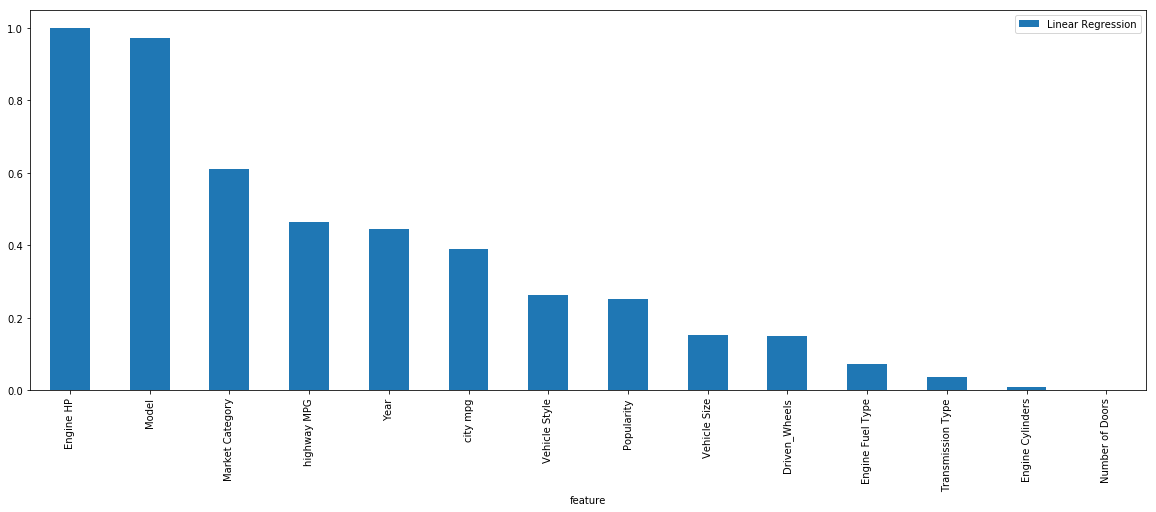

In [47]:
feature_score.sort_values('Linear Regression', ascending=False).plot(kind='bar', figsize=(20, 7))